# Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

In [2]:
import cv2
import glob

# Function

In [231]:
dataset = np.load('../../r-scripts/getting-data-current/data-sets/x_train.npy')

In [233]:
def get_sum_heatmap_from_files(data_name, layer, verbose = True, dataset = dataset):
    npy_loading_pattern = "results/all_matrices_" + data_name + "_" + layer + "*.npy"
    data_loading_path = glob.glob(npy_loading_pattern)
    
    if verbose: print("Loading", data_name, "data from", len(data_loading_path) ,"files...")
    
    # Initalize empty matrix
    all_matrices = np.empty([0 , 1, np.load(data_loading_path[0]).shape[2]])

    # Append matrices from files
    for path in data_loading_path:
        data = np.load(path)
        all_matrices = np.concatenate((all_matrices, data))
        
    if verbose: print("Loaded", all_matrices.shape[0], "data samples")
    sum_all_matrices = np.sum(all_matrices, axis = 0)
    
    # Calculate heatmap
    heatmap = np.maximum(sum_all_matrices, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (dataset.shape[1], dataset.shape[2]))

    
    return(heatmap)

In [218]:
def plot_heatmap(data, from_data, to_data, colorbar = None):
    plt.matshow(data[:,from_data:to_data], cmap = 'viridis', origin = "lower", vmin = 0, vmax = 1)
    ax = plt.gca()
    plot = ax.axes.get_yaxis().set_visible(False)
    if colorbar == "Yes":
        plt.colorbar()
    
    return plot

# Get heatmaps

In [219]:
x_train_sum_heatmap = get_sum_heatmap_from_files("x_train", "conv1d_4")

Loading x_train data from 19 files...
Loaded 462 data samples


In [182]:
x_val_sum_heatmap = get_sum_heatmap_from_files("x_val", "conv1d_4")

Loading x_val data from 7 files...
Loaded 153 data samples


In [183]:
x_test_sum_heatmap = get_sum_heatmap_from_files("x_test", "conv1d_4")

Loading x_test data from 6 files...
Loaded 150 data samples


## Plot of training data 

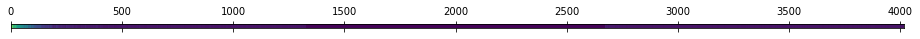

In [220]:
# Plot all of the  
plot_heatmap(x_train_sum_heatmap, x_train_sum_heatmap.shape[0], x_train_sum_heatmap.shape[1])

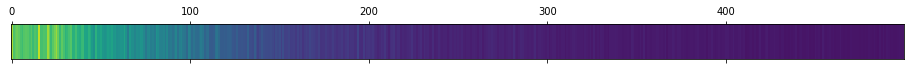

In [221]:
plot_heatmap(x_train_sum_heatmap, 0, 500)

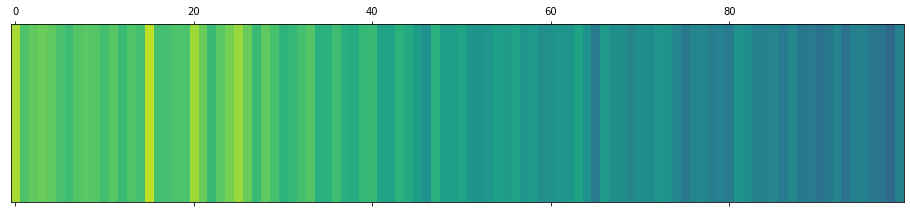

In [227]:
plot_heatmap(x_train_sum_heatmap, 0, 100)

## Plot of validation data 

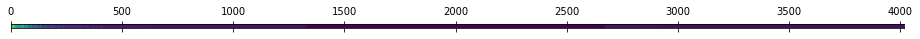

In [224]:
# Plot all of the entire data
plot_heatmap(x_val_sum_heatmap ,x_val_sum_heatmap.shape[0], x_val_sum_heatmap.shape[1])

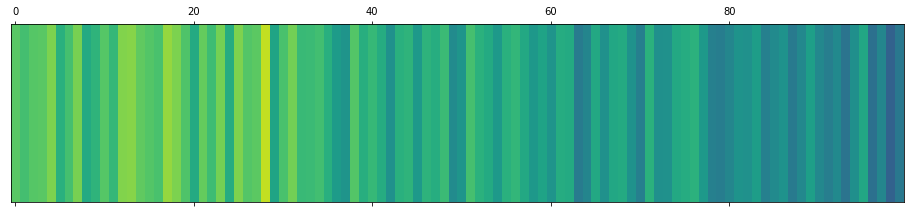

In [228]:
plot_heatmap(x_val_sum_heatmap, 0, 100)

## Plot of test data 

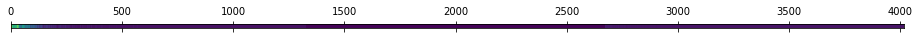

In [229]:
# Plot all of the entire data
plot_heatmap(x_test_sum_heatmap ,x_test_sum_heatmap.shape[0], x_test_sum_heatmap.shape[1])

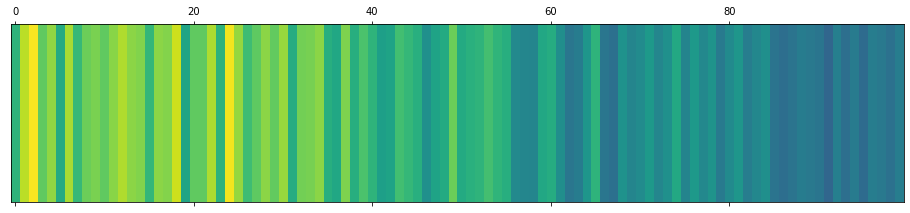

In [243]:
plot_heatmap(x_test_sum_heatmap, 0, 100)

## Plot of all of the data

In [235]:
all_data = get_sum_heatmap_from_files(data_name = "*", layer = "conv1d_4", verbose = True, dataset = dataset)

Loading * data from 32 files...
Loaded 765 data samples


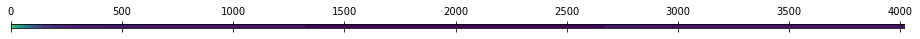

In [236]:
# Plot all of the entire data
plot_heatmap(all_data ,all_data.shape[0], all_data.shape[1])

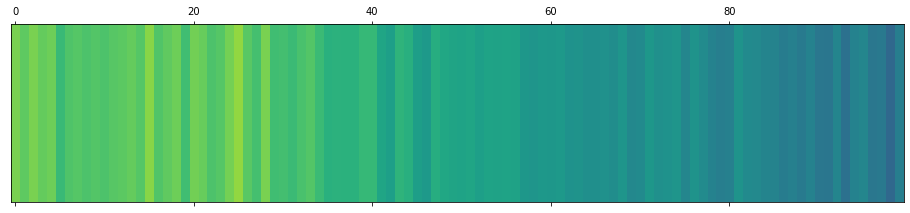

In [240]:
plot_heatmap(all_data, 0, 100)